In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats

## # example 1 : 다른분포 - 평균은 같은

### ## simulation

In [48]:
lambda_ = 1/10
sss = np.random.exponential(scale = 1/lambda_, size = 1000)

In [49]:
sss.mean() # 10에 비슷하다!

10.208575138569914

In [50]:
### 모수 정해주기 - 평균 같게
mu1, sigma1 = 10, 2
lambda_ = 1/10

In [51]:
s1 = np.random.normal(mu1, sigma1, 50000)
s2 = np.random.exponential(scale = 1/lambda_, size = 8000)

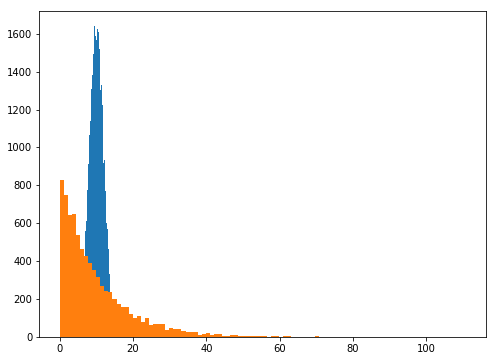

In [52]:
plt.figure(figsize = (8,6))
plt.hist(s1, bins=100)
plt.hist(s2, bins=100)

plt.show()
plt.close()

In [53]:
s1_sample = []
s2_sample = []
for i in range(10000):
    s1_sample.append( np.random.choice(s1, 1000) )
    s2_sample.append( np.random.choice(s2, 1000) )

In [54]:
len(s1_sample)

10000

In [55]:
pp = 0
for i in range(len(s1_sample)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(s1_sample[i], s2_sample[i], equal_var=True)
    if test_result[1] < 0.1 :  # 유의수준 0.1 (0.1 미만이면 기각)
        pp += 1

In [56]:
# p-value 
1-pp/len(s1_sample) # 0 : 귀무가설 기각

0.907

In [57]:
## 사후분석
result = pd.DataFrame({'normal': np.array(s1_sample).mean(axis=1), 'exp' : np.array(s2_sample).mean(axis=1)})

In [58]:
result

,normal,exp
0,10.102152,10.259033
1,10.022823,10.404084
2,10.006367,10.520499
3,10.083436,9.860945
4,9.960138,10.189700
5,9.980111,10.306229
6,9.963186,9.868786
7,9.964041,9.555263
8,10.065582,9.827888
9,9.989868,9.850562


---

### ## t-test

#### **kormogorov 동질성 검정*

In [59]:
stats.ks_2samp(s1, s2)

Ks_2sampResult(statistic=0.43742, pvalue=0.0)

- (결과) : 정규성 검정(동일 분포 검정) 결과 귀무가설을 기각할 수 없으므로(p-value=0.4545, 유의수준 0.1이라고 해도), 정규성을 만족한다(혹은 동일 분포이다.).

### **shapiro-wilk 정규성 검정*

In [60]:
stats.shapiro(s1)  # p-value값 정규성 만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9999786019325256, 0.9949302673339844)

In [61]:
stats.shapiro(s2) # p-value값 정규성 불만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8137226104736328, 0.0)

---

### **등분산 검정*

- 등분산 검정은 두 정규 분포로부터 생성된 두개의 데이터 집단으로부터 두 정규 분포의 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 ***bartlett, finger, levene*** 명령을 제공한다.


    - scipy.stats.bartlett : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
    - scipy.stats.fligner : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
    - scipy.stats.levene : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

### **등분산 검정*

In [62]:
stats.bartlett(s1, s2)

BartlettResult(statistic=58965.37879413534, pvalue=0.0)

In [63]:
stats.fligner(s1, s2)

FlignerResult(statistic=16330.66755970641, pvalue=0.0)

In [64]:
stats.levene(s1, s2)

LeveneResult(statistic=20170.894267191492, pvalue=0.0)

---

### **독립 표본 t-검정*

- 독립표본 t검정(Independent two sample t-test)은 두 개의 독립적인 정규분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 가설검정한다. SciPy stats 서브패키지의 ***ttest_ind***  명령을 사용한다. 독립 표본 t-검정은 두 저규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문이 ***equal_var*** 인수를 사용하여 이를 지정해 주어야 한다.

In [65]:
stats.ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=-0.2618025664041616, pvalue=0.7934803158171201)

---

---

## # example 1.1  : 다른분포

### # 시뮬레이션

In [16]:
mu1, sigma1 = 0, 2
mu2, sigma2 = 2, 2

In [17]:
s1 = np.random.normal(mu1, sigma1, 50000)
s2 = np.random.normal(mu2, sigma2, 8000)

In [18]:
s1_sample = []
s2_sample = []
for i in range(10000):
    s1_sample.append( np.random.choice(s1, 1000) )
    s2_sample.append( np.random.choice(s2, 1000) )

In [19]:
len(s1_sample)

10000

---

In [22]:
pp = 0
t_stat = []

for i in range(len(s1_sample)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(s1_sample[i], s2_sample[i], equal_var=True)
    t_stat.append( test_result[0] ) # t-stat 저장
    if test_result[1] < 0.1 :  # 유의수준 0.1 (0.1 미만이면 기각)
        pp += 1

In [23]:
# p-value 
1-pp/len(s1_sample) # 0 : 귀무가설 기각

0.0

In [33]:
s1_sample[0].mean() - s2_sample[0].mean()

-1.9265758982342418

In [35]:
s1_sample[1].mean() - s2_sample[1].mean()

-2.0222128577346186

In [36]:
s1_sample[2].mean() - s2_sample[2].mean()

-2.196960070765089

In [37]:
s1_sample[3].mean() - s2_sample[3].mean()

-2.0256193337661137

In [24]:
s1 = np.random.normal(0, 1, 10000)

In [25]:
t_stat

[-21.71781447269977,
 -22.66486114633719,
 -23.944066252067053,
 -23.051507779845913,
 -23.81559788834512,
 -23.2197701078537,
 -22.313225384880806,
 -24.029401697669265,
 -23.507029681996748,
 -21.938834848355043,
 -23.465213932421648,
 -21.37861782413483,
 -22.721364102882294,
 -23.24359838050858,
 -23.26255597291777,
 -23.773217848802563,
 -24.548272331839325,
 -23.606203742700973,
 -22.680862282163936,
 -21.931212173863823,
 -21.94414417542884,
 -23.601278205554742,
 -23.112304246323244,
 -23.029341411299647,
 -23.488456586310182,
 -22.513242344411413,
 -22.476401755173075,
 -22.71545345642281,
 -22.259589198829065,
 -22.150880078683695,
 -22.060179501549836,
 -24.13581643486297,
 -25.96117958655338,
 -21.680012062638607,
 -24.11701319277151,
 -23.523796909204755,
 -23.750619974604092,
 -22.230411912546444,
 -21.55546413131026,
 -22.607342024455082,
 -23.22455498677923,
 -23.700327680414965,
 -24.046138694236856,
 -23.794591678027103,
 -22.02709739149254,
 -22.94442549754834,
 -23.

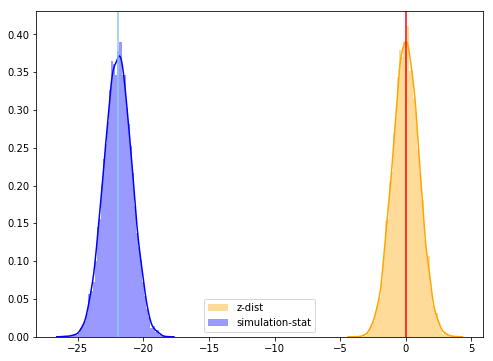

In [14]:
plt.figure(figsize = (8,6))

sns.distplot( s1 , bins = 50, color='orange', label = 'z-dist')
sns.distplot(t_stat, bins = 50, color = 'blue', label= 'simulation-stat')


plt.axvline(x=0, color = 'red')
plt.axvline(x=np.array(t_stat).mean(), color = 'skyblue')

plt.legend()
plt.show()
plt.close()

----

### # t-test

#### **kormogorov 동질성 검정*

In [28]:
stats.ks_2samp(s1, s2)

Ks_2sampResult(statistic=0.39226000000000005, pvalue=0.0)

- (결과) : 정규성 검정(동일 분포 검정) 결과 귀무가설을 기각할 수 없으므로(p-value=0.4545, 유의수준 0.1이라고 해도), 정규성을 만족한다(혹은 동일 분포이다.).

### **shapiro-wilk 정규성 검정*

In [29]:
stats.shapiro(s1)  # p-value값 정규성 만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9999642968177795, 0.8759381175041199)

In [30]:
stats.shapiro(s2) # p-value값 정규성 만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9998195767402649, 0.7884788513183594)

---

### **등분산 검정*

- 등분산 검정은 두 정규 분포로부터 생성된 두개의 데이터 집단으로부터 두 정규 분포의 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 ***bartlett, finger, levene*** 명령을 제공한다.


    - scipy.stats.bartlett : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
    - scipy.stats.fligner : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
    - scipy.stats.levene : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

### **등분산 검정*

In [31]:
stats.bartlett(s1, s2)

BartlettResult(statistic=0.2727142953620034, pvalue=0.6015167844565823)

In [32]:
stats.fligner(s1, s2)

FlignerResult(statistic=0.6074911837380655, pvalue=0.4357339905129901)

In [33]:
stats.levene(s1, s2)

LeveneResult(statistic=0.6067907899696998, pvalue=0.4360018776836586)

---

### **독립 표본 t-검정*

- 독립표본 t검정(Independent two sample t-test)은 두 개의 독립적인 정규분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 가설검정한다. SciPy stats 서브패키지의 ***ttest_ind***  명령을 사용한다. 독립 표본 t-검정은 두 저규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문이 ***equal_var*** 인수를 사용하여 이를 지정해 주어야 한다.

In [34]:
stats.ttest_ind(s1, s2, equal_var=True)

Ttest_indResult(statistic=-83.81719435430843, pvalue=0.0)

---

---

## # example 2 : 같은 분포

### # simulation

In [35]:
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 0, 0.1

In [36]:
s1 = np.random.normal(mu1, sigma1, 50000)
s2 = np.random.normal(mu2, sigma2, 8000)

In [37]:
s1_sample = []
s2_sample = []
for i in range(10000):
    s1_sample.append( np.random.choice(s1, 1000) )
    s2_sample.append( np.random.choice(s2, 1000) )

In [38]:
len(s1_sample)

10000

In [39]:
pp = 0
for i in range(len(s1_sample)):
    # equal variance test
    #var_test = stats.levene(sub_a_notgc[i], sub_b_notgc[i]) # 동분산이라고 가정하고
    
    test_result = stats.ttest_ind(s1_sample[i], s2_sample[i], equal_var=True)
    if test_result[1] < 0.1 :  # 유의수준 0.1 (0.1 미만이면 기각)
        pp += 1

In [40]:
# p-value 
1-pp/len(s1_sample) # 0 : 귀무가설 기각

0.8984

---

### # t-test

#### **kormogorov 동질성 검정*

In [41]:
stats.ks_2samp(s1, s2)

Ks_2sampResult(statistic=0.00941000000000003, pvalue=0.5726947633965503)

- (결과) : 정규성 검정(동일 분포 검정) 결과 귀무가설을 기각할 수 없으므로(p-value=0.4545, 유의수준 0.1이라고 해도), 정규성을 만족한다(혹은 동일 분포이다.).

### **shapiro-wilk 정규성 검정*

In [42]:
stats.shapiro(s1)  # p-value값 정규성 만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.999951958656311, 0.6289547085762024)

In [43]:
stats.shapiro(s2) # p-value값 정규성 만족

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.999819815158844, 0.7895084619522095)

---

### **등분산 검정*

- 등분산 검정은 두 정규 분포로부터 생성된 두개의 데이터 집단으로부터 두 정규 분포의 모수가 같은지 확인하기 위한 검정이다. 가장 기본적인 방법은 F분포를 사용하는 것이지만 실무에서는 이보다 더 성능이 좋은 ***bartlett, finger, levene*** 명령을 제공한다.


    - scipy.stats.bartlett : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
    - scipy.stats.fligner : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fligner.html
    - scipy.stats.levene : http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

### **등분산 검정*

In [44]:
stats.bartlett(s1, s2)

BartlettResult(statistic=0.13690051599393274, pvalue=0.7113819708516997)

In [45]:
stats.fligner(s1, s2)

FlignerResult(statistic=0.499392002941202, pvalue=0.4797673926877908)

In [46]:
stats.levene(s1, s2)

LeveneResult(statistic=0.4918945040129672, pvalue=0.483086238632078)

---

### **독립 표본 t-검정*

- 독립표본 t검정(Independent two sample t-test)은 두 개의 독립적인 정규분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지를 가설검정한다. SciPy stats 서브패키지의 ***ttest_ind***  명령을 사용한다. 독립 표본 t-검정은 두 저규 분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정 통계량이 다르기 때문이 ***equal_var*** 인수를 사용하여 이를 지정해 주어야 한다.

In [47]:
stats.ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=0.6068783125174582, pvalue=0.5439445463893864)

---